<a href="https://colab.research.google.com/github/gkrisp98/Autoencoder-for-soil-data/blob/main/AUTOENCODER3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ggplot

In [ ]:
import pandas as pd
otutable = pd.read_csv('/content/drive/MyDrive/abundance-Soil-non-saline.tsv', sep = '\t', index_col=0)

In [ ]:
otu = otutable

In [ ]:
otu

,S44,S79,S102,S111,S113,S119,S134,S138,S155,S170,...,S1826,S1852,S1878,S1879,S1896,S1901,S1965,S1968,S1980,S1981
seqID,,,,,,,,,,,,,,,,,,,,,
seq32,0,0,0,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,62,0
seq87,0,0,6,0,0,0,0,0,1,0,...,0,0,0,3,0,0,0,0,0,3
seq99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,10,27
seq111,1,2,44,0,0,32,0,0,433,700,...,13,0,0,177,132,7,0,18,403,0
seq224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
seq316795,0,0,3,0,0,0,7,0,6,0,...,105,0,0,0,6,0,0,0,7,0
seq316981,4,37,0,0,0,2,0,0,148,0,...,0,0,0,87,0,0,0,12,24,11
seq317036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,10,0,0,0,0,0,0


In [ ]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [ ]:
class AutoEncoders(Model):

  def __init__(self, output_units):

    super().__init__()
    self.encoder = Sequential(
        [
          Dense(129, activation="relu"),
          #Dense(64, activation="relu"),
          #Dense(32, activation="relu"),
          #Dense(16, activation = "relu"),
          #Dense(8, activation = "relu"),
          #Dense(4, activation = "relu"),
          Dense(2, activation = "relu")
        ]
    )

    self.decoder = Sequential(
        [
          Dense(2, activation = "relu"),
          #Dense(4, activation = "relu"),
          #Dense(8, activation="relu"),
          #Dense(16, activation="relu"),
          #Dense(32, activation = "relu"),
          #Dense(64, activation = "relu"),
          Dense(129, activation = "relu"),
          Dense(output_units, activation="sigmoid")
        ]
    )

  def call(self, inputs):

    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded
  
auto_encoder = AutoEncoders(len(otu.columns))

auto_encoder.compile(
    loss='mae',
    metrics=['mae'],
    optimizer='adam'
)

history = auto_encoder.fit(
    otu, 
    otu, 
    epochs=4, 
    batch_size=32, 
    #validation_data=(otu, otu)
)

Epoch 1/4
103/103 [==============================] - 1s 2ms/step - loss: 11.5868 - mae: 11.5868
Epoch 2/4
103/103 [==============================] - 0s 2ms/step - loss: 11.5290 - mae: 11.5290
Epoch 3/4
103/103 [==============================] - 0s 2ms/step - loss: 11.5278 - mae: 11.5278
Epoch 4/4
103/103 [==============================] - 0s 2ms/step - loss: 11.5278 - mae: 11.5278


In [ ]:
encoder_layer = auto_encoder.get_layer('sequential')
reduced_df = pd.DataFrame(encoder_layer.predict(otu))
reduced_df = reduced_df.add_prefix('S_')

In [ ]:
reduced_df.insert(0, 'Col', range(0,len(reduced_df)))

In [ ]:
reduced_df

,Col,S_0,S_1
0,0,156.641983,199.405655
1,1,20.405941,95.613785
2,2,68.314705,142.001770
3,3,2647.833008,7186.339844
4,4,148.970154,224.589111
...,...,...,...
3271,3271,1071.689209,1647.051514
3272,3272,95.516029,867.421448
3273,3273,18.088142,195.302124
3274,3274,2271.273193,4183.951172


In [ ]:
col = pd.to_numeric(reduced_df['Col'])

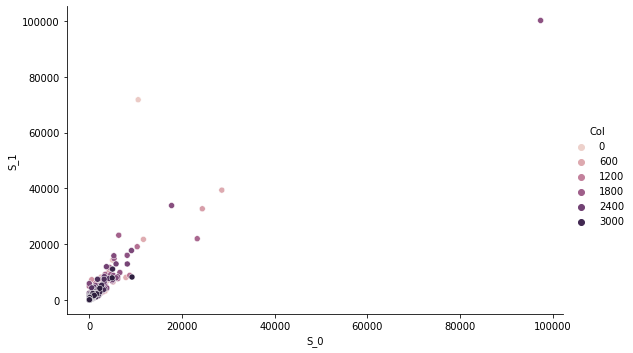

In [ ]:
import seaborn
seaborn.relplot(data=reduced_df, x='S_0', y='S_1', hue='Col', hue_order=reduced_df['Col'], aspect=1.61)
plt.show()

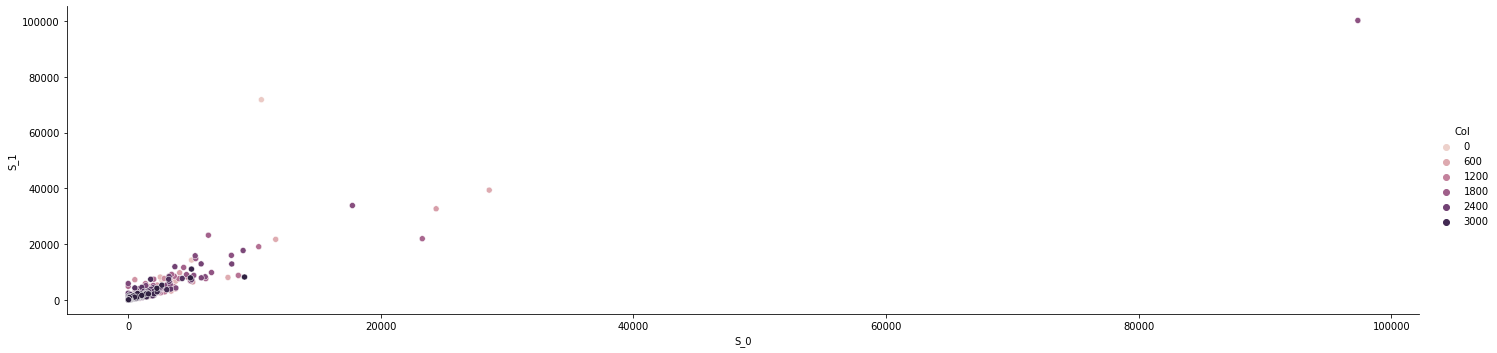

In [ ]:
seaborn.relplot(data=reduced_df, x='S_0', y='S_1', hue='Col', hue_order=reduced_df['Col'], aspect = 4)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


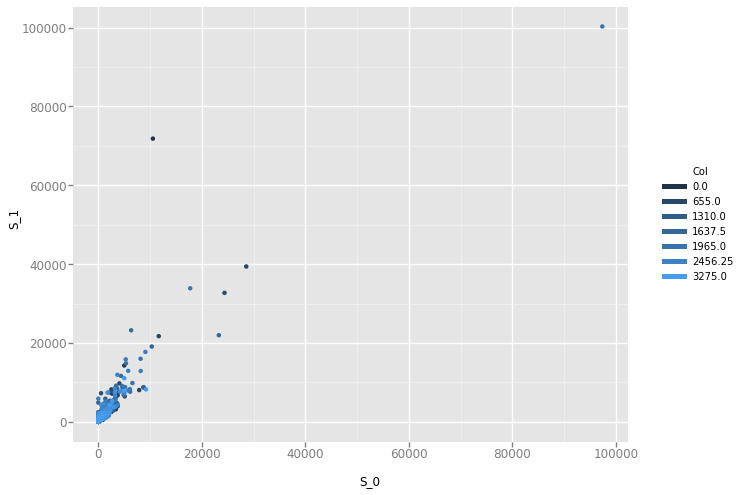

<ggplot: (8747501393109)>

In [ ]:
from ggplot import *
import rpy2
ggplot(aes(x = 'S_0', y = 'S_1', color = 'Col'), data = reduced_df) + geom_point()

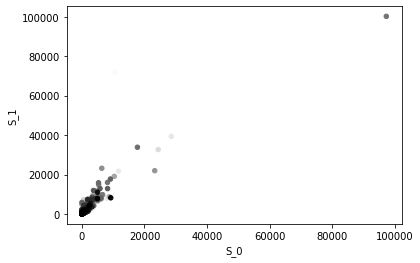

In [ ]:
ax = reduced_df.plot.scatter(x = 'S_0', y = 'S_1', color = col)

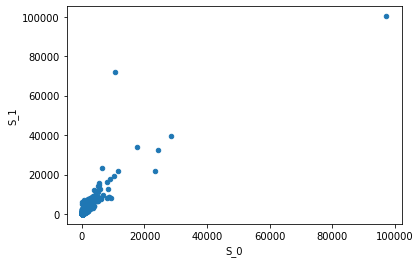

In [ ]:
#PLOT SCATTER
ax = reduced_df.plot.scatter(x = 'S_0', y = 'S_1')

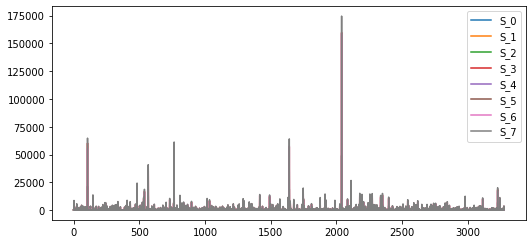

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
reduced_df.plot()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def scale_dataset(x_train):
  standard_scaler = MinMaxScaler()
  x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(x_train), columns = x_train.columns)
  return x_train_scaled

In [ ]:
otu_scaled = scale_dataset(otu)

In [ ]:
otu_scaled

seqID,seq32,seq87,seq99,seq111,seq224,seq310,seq333,seq445,seq517,seq528,...,seq316078,seq316118,seq316693,seq316701,seq316792,seq316795,seq316981,seq317036,seq317174,seq317193
0,0.000000,0.000000,0.000000,0.000440,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.015810,0.0,0.508338,0.000000
1,0.000000,0.000000,0.000000,0.000879,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.01626,0.000000,0.000000,0.146245,0.0,0.000000,0.000000
2,0.000000,0.193548,0.000000,0.019341,0.00,0.000000,0.000000,0.000000,0.036290,0.068966,...,0.000000,0.0,0.000000,0.00000,1.000000,0.002208,0.000000,0.0,0.003088,0.033333
3,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.027027,0.0,0.000000,0.00000,0.022472,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0.000000,0.000000,0.000000,0.003077,0.00,0.444444,0.428571,0.766667,0.000000,0.000000,...,0.000000,0.0,0.186667,0.00000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
125,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
126,0.000000,0.000000,0.000000,0.007912,0.00,0.000000,0.000000,0.000000,0.100806,0.000000,...,0.000000,0.0,0.000000,0.01626,0.056180,0.000000,0.047431,0.0,0.000000,0.133333
127,0.358382,0.000000,0.243902,0.177143,1.00,0.000000,0.714286,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.089888,0.005151,0.094862,0.0,0.038295,0.000000


In [ ]:
class AutoEncoders(Model):

  def __init__(self, output_units):

    super().__init__()
    self.encoder = Sequential(
        [
          Dense(3276, activation="relu"),
          Dense(2000, activation = "relu"),
          Dense(1000, activation="relu"),
          Dense(512, activation = "relu"),
          Dense(256, activation="relu"),
          Dense(128, activation = "relu"),
          Dense(10, activation = "relu")
        ]
    )

    self.decoder = Sequential(
        [
          Dense(10, activation="relu"),
          Dense(128, activation="relu"),
          Dense(256, activation = "relu"),
          Dense(512, activation = "relu"),
          Dense(1000, activation = "relu"),
          Dense(2000, activation = "relu"),
          Dense(3276, activation = "relu"),
          Dense(output_units, activation="sigmoid")
        ]
    )

  def call(self, inputs):

    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded
  
auto_encoder = AutoEncoders(len(otu_scaled.columns))

auto_encoder.compile(
    loss='mae',
    metrics=['mae'],
    optimizer='adam'
)

history = auto_encoder.fit(
    otu_scaled, 
    otu_scaled, 
    epochs=30, 
    batch_size=1, 
    #validation_data=(otu, otu)
)

Epoch 1/30
129/129 [==============================] - 22s 161ms/step - loss: 0.0582 - mae: 0.0582
Epoch 2/30
129/129 [==============================] - 21s 163ms/step - loss: 0.0376 - mae: 0.0376
Epoch 3/30
129/129 [==============================] - 22s 167ms/step - loss: 0.0376 - mae: 0.0376
Epoch 4/30
129/129 [==============================] - 21s 161ms/step - loss: 0.0376 - mae: 0.0376
Epoch 5/30
129/129 [==============================] - 23s 178ms/step - loss: 0.0376 - mae: 0.0376
Epoch 6/30
129/129 [==============================] - 21s 165ms/step - loss: 0.0376 - mae: 0.0376
Epoch 7/30
129/129 [==============================] - 21s 166ms/step - loss: 0.0376 - mae: 0.0376
Epoch 8/30
129/129 [==============================] - 21s 166ms/step - loss: 0.0376 - mae: 0.0376
Epoch 9/30
129/129 [==============================] - 21s 165ms/step - loss: 0.0376 - mae: 0.0376
Epoch 10/30
129/129 [==============================] - 21s 164ms/step - loss: 0.0376 - mae: 0.0376
Epoch 11/30
129/129

In [ ]:
encoder_layer = auto_encoder.get_layer('sequential_10')
reduced_df = pd.DataFrame(encoder_layer.predict(otu_scaled))
reduced_df = reduced_df.add_prefix('otu_')

In [ ]:
reduced_df

,otu_0,otu_1,otu_2,otu_3,otu_4,otu_5,otu_6,otu_7,otu_8,otu_9
0,157.511841,0.0,1132.981689,1507.757080,278.641602,0.0,613.757751,510.269867,1122.866089,755.306030
1,150.291183,0.0,1081.487061,1439.250610,265.978668,0.0,585.893494,487.071686,1071.758179,720.980713
2,334.736053,0.0,2408.198975,3204.772949,592.225830,0.0,1304.630371,1084.604492,2386.527832,1605.508301
3,36.135941,0.0,260.102661,346.151428,63.977768,0.0,140.904694,117.142250,257.754303,173.408112
4,160.074799,0.0,1151.812866,1532.822144,283.234955,0.0,624.016418,518.766479,1141.405640,767.887878
...,...,...,...,...,...,...,...,...,...,...
124,474.322571,0.0,3410.299072,4538.240723,838.521790,0.0,1847.246826,1535.975586,3379.743652,2273.508789
125,54.894436,0.0,394.897156,525.512451,97.104187,0.0,213.922226,177.849152,391.348938,263.265167
126,344.533630,0.0,2479.140381,3299.145020,609.612061,0.0,1342.985229,1116.550781,2456.673096,1652.738892
127,567.537415,0.0,4083.321045,5434.057129,1004.059204,0.0,2212.049561,1839.154297,4046.351318,2722.337402


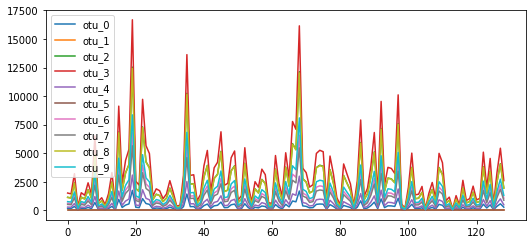

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
reduced_df.plot()
plt.show()